## 🤖 Clustering Setup
`KMeans` from `sklearn.cluster` is used for partition-based clustering.

`matplotlib.pyplot` allows plotting charts, which is useful for visualizing clusters.

`pandas` provides efficient data structures (`DataFrame`) to load, store, and manipulate tabular data.

`dendrogram` and `linkage` from `scipy.cluster.hierarchy` are tools for hierarchical clustering and visualizing cluster relationships.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

X = pd.read_csv("../data/processed/processed_X.csv")

## **📊 K-Means and Elbow Method**
### 1. SSE (Sum of Squared Errors):

- Measures how close each data point is to its cluster center.

- Lower SSE values indicate better clustering, but too many clusters can lead to overfitting.

### 2. Elbow Method:

- Plot SSE against the number of clusters (K).

- The "elbow" point where the SSE curve bends sharply is considered the optimal number of clusters.

### 3. Fitting K-Means:

- `KMeans(n_clusters=2)` creates two clusters based on the Elbow Method.

- `fit_predict` assigns each data point to a cluster.

### 4. Adding Cluster Labels:

- `X["cluster"]` stores cluster assignments so you can use them for analysis or visualization later.

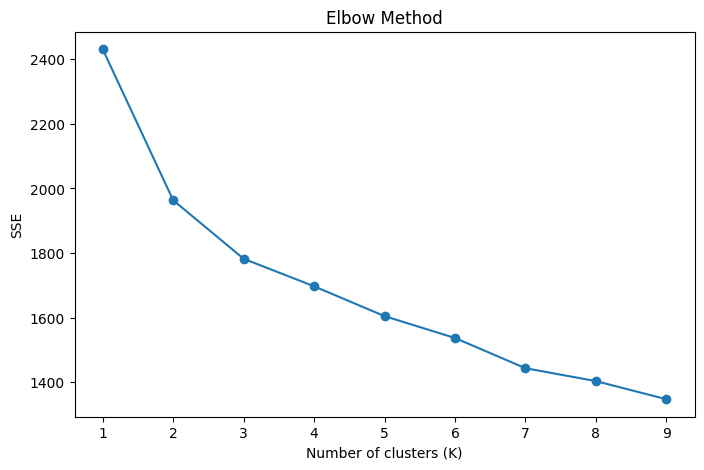

In [2]:
sse = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

X["cluster"] = clusters

## **🌳 Hierarchical Clustering Dendrogram**

Hierarchical clustering was performed using Ward’s method. The dendrogram shows how points merge step by step into clusters. 

Each leaf represents a single data point, and branch heights indicate the distances at which clusters are joined. 
Taller branches reflect clusters that are farther apart, while shorter branches indicate tighter, more similar points. 

The visualization suggests two main clusters, supporting the K-Means results, and also reveals potential subclusters within the main groups.


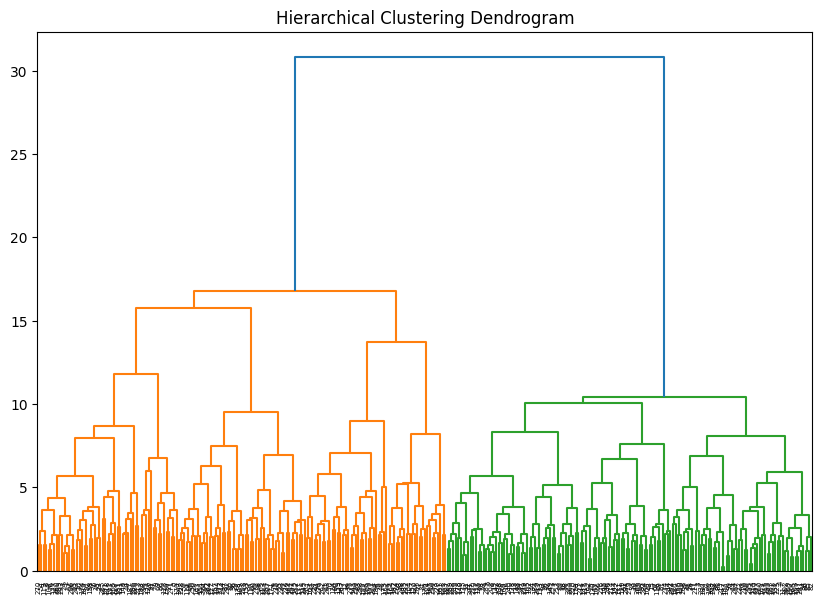

In [3]:
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


## **📊 K-Means vs True Labels**

After applying K-Means with two clusters, we compared the cluster assignments with the true labels. The crosstab shows that Cluster 0 mostly contains points from class 1, and Cluster 1 mostly contains points from class 0. This indicates that K-Means successfully separated the data into two groups, but the cluster numbers do not directly match the true labels.

which is normal in unsupervised learning,his behavior is expected and does not mean the clustering failed. For interpretation, the cluster labels can be swapped to match the true labels.

Overall, the clustering captures the main patterns in the data effectively.

In [4]:
y = pd.read_csv("../data/processed/y_pca_95.csv").values.ravel()
comparison = pd.crosstab(X["cluster"], y)
print(comparison)

col_0      0    1
cluster          
0         37  101
1        127   38
